# Desafio: Análise de Dados
<hr>

#### Respondendo a perguntas de negócio propostos no desafio final do curso <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fisico_clientes_original = pd.read_csv("./clientes_caracteristicas_fisicas.csv", delimiter=",")
df_demografico_clientes_original = pd.read_csv("./clientes_informacoes_demograficas.csv", delimiter=";")

In [3]:
df_fisico_clientes_original.head()

,ID Cliente,Cor do Cabelo,Cor dos Olhos,Cor da Pele,Altura (cm),Peso (kg),Tatuagens,Piercings,Tipo Sanguíneo,Tipo de Pele
0,1,Castanho,Verde,Negra,182.81,66.71,1,1,AB+,Mista
1,2,Castanho,Castanho,Parda,168.21,65.74,2,2,AB+,Oleosa
2,3,Preto,Azul,Branca,169.54,109.91,1,1,B+,Oleosa
3,4,Loiro,Castanho,Negra,167.25,100.10,4,3,O+,Oleosa
4,5,Loiro,Preto,Negra,152.45,117.68,1,0,B+,Mista


In [4]:
df_demografico_clientes_original.head()

,ID Cliente,Escolaridade,Tem Filhos,Salário,Idade,Estado,Estado Civil,Profissão,Hobbies (Código),Número de Cartões de Crédito
0,1,Fundamental,Sim,4561.18,42.16,MA,Viúvo,Professor,R,3
1,2,Superior,Sim,7344.43,46.99,TO,Solteiro,Outros,E,2
2,3,Fundamental,Não,5467.59,64.53,PI,Solteiro,Empresário,RC,3
3,4,Pós-Graduação,Não,1886.92,33.76,RJ,Divorciado,Professor,MLM,2
4,5,Superior,Não,9703.03,35.94,AP,Viúvo,Médico,CXC,1


In [5]:
# realizando o merge dos Data Frames com base no ID do Cliente
df_grouped_original= pd.merge(df_fisico_clientes_original, df_demografico_clientes_original, on='ID Cliente', how='outer')
df_grouped_original.head()

,ID Cliente,Cor do Cabelo,Cor dos Olhos,Cor da Pele,Altura (cm),Peso (kg),Tatuagens,Piercings,Tipo Sanguíneo,Tipo de Pele,Escolaridade,Tem Filhos,Salário,Idade,Estado,Estado Civil,Profissão,Hobbies (Código),Número de Cartões de Crédito
0,1,Castanho,Verde,Negra,182.81,66.71,1,1,AB+,Mista,Fundamental,Sim,4561.18,42.16,MA,Viúvo,Professor,R,3
1,2,Castanho,Castanho,Parda,168.21,65.74,2,2,AB+,Oleosa,Superior,Sim,7344.43,46.99,TO,Solteiro,Outros,E,2
2,3,Preto,Azul,Branca,169.54,109.91,1,1,B+,Oleosa,Fundamental,Não,5467.59,64.53,PI,Solteiro,Empresário,RC,3
3,4,Loiro,Castanho,Negra,167.25,100.10,4,3,O+,Oleosa,Pós-Graduação,Não,1886.92,33.76,RJ,Divorciado,Professor,MLM,2
4,5,Loiro,Preto,Negra,152.45,117.68,1,0,B+,Mista,Superior,Não,9703.03,35.94,AP,Viúvo,Médico,CXC,1


In [6]:
df_grouped_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Cliente                    5028 non-null   int64  
 1   Cor do Cabelo                 5028 non-null   object 
 2   Cor dos Olhos                 5028 non-null   object 
 3   Cor da Pele                   5028 non-null   object 
 4   Altura (cm)                   5028 non-null   float64
 5   Peso (kg)                     5028 non-null   float64
 6   Tatuagens                     5028 non-null   int64  
 7   Piercings                     5028 non-null   int64  
 8   Tipo Sanguíneo                5028 non-null   object 
 9   Tipo de Pele                  5028 non-null   object 
 10  Escolaridade                  5028 non-null   object 
 11  Tem Filhos                    5028 non-null   object 
 12  Salário                       5028 non-null   float64
 13  Ida

In [7]:
df_grouped_original.describe()

,ID Cliente,Altura (cm),Peso (kg),Tatuagens,Piercings,Salário,Idade,Número de Cartões de Crédito
count,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,4997.000000,5028.000000
mean,2514.344073,174.888508,79.565274,2.506762,1.514121,5496.094996,49.132467,1.486675
std,1451.335782,14.585630,23.249313,1.700511,1.121609,2576.332871,17.903934,1.121619
min,1.000000,150.000000,40.010000,0.000000,0.000000,1000.280000,18.010000,0.000000
25%,1257.750000,162.100000,59.475000,1.000000,1.000000,3291.430000,33.690000,0.000000
50%,2514.500000,175.020000,79.235000,3.000000,2.000000,5494.995000,49.210000,1.000000
75%,3771.250000,187.585000,99.947500,4.000000,3.000000,7708.867500,64.670000,2.000000
max,5000.000000,199.990000,120.000000,5.000000,3.000000,9996.280000,80.000000,3.000000


In [8]:
# consultando valores ausentes
print(df_grouped_original.isna().sum())

ID Cliente                       0
Cor do Cabelo                    0
Cor dos Olhos                    0
Cor da Pele                      0
Altura (cm)                      0
Peso (kg)                        0
Tatuagens                        0
Piercings                        0
Tipo Sanguíneo                   0
Tipo de Pele                     0
Escolaridade                     0
Tem Filhos                       0
Salário                          0
Idade                           31
Estado                           0
Estado Civil                     0
Profissão                        0
Hobbies (Código)                 1
Número de Cartões de Crédito     0
dtype: int64


In [9]:
#Exclusão dos dados categóricos ausentes(Hobbies)
df_grouped_clean = df_grouped_original.dropna(subset=['Hobbies (Código)'])

In [10]:
#Substituição dos valores de idade ausentes pela média da idade dotaframe
df_grouped_clean_final = df_grouped_clean.fillna({'Idade': df_grouped_clean['Idade'].mean()})

In [11]:
print(df_grouped_clean_final.isna().sum())

ID Cliente                      0
Cor do Cabelo                   0
Cor dos Olhos                   0
Cor da Pele                     0
Altura (cm)                     0
Peso (kg)                       0
Tatuagens                       0
Piercings                       0
Tipo Sanguíneo                  0
Tipo de Pele                    0
Escolaridade                    0
Tem Filhos                      0
Salário                         0
Idade                           0
Estado                          0
Estado Civil                    0
Profissão                       0
Hobbies (Código)                0
Número de Cartões de Crédito    0
dtype: int64


### Pergunta 1:
Após a coleta de todos os dados, responda: quantos códigos de hobbies distintos estão presentes na base de dados?

In [12]:
df_grouped_clean_final['Hobbies (Código)'].nunique()

3517

### Pergunta 2:
Qual é a cor de cabelo mais comum entre os clientes?

In [13]:
df_hair_commom = df_grouped_clean_final['Cor do Cabelo'].value_counts().idxmax()
print(df_hair_commom)

Ruivo


### Pergunta 3:
Existe alguma correlação entre a altura e o peso dos clientes?

In [14]:
corr = df_grouped_clean_final['Altura (cm)'].corr(df_grouped_clean_final['Peso (kg)'])
print(corr)

0.007231380912101932


### Pergunta 4:
Qual é o estado com a maior média de salário entre os clientes?


In [15]:
df_grouped_estate = df_grouped_clean_final.groupby('Estado')
df_grouped_estate_final = df_grouped_estate['Salário'].mean().sort_values(ascending = False).idxmax()
print(df_grouped_estate_final)

PI


### Pergunta 5:
Qual é a distribuição da idade dos clientes? Utilize bins=30

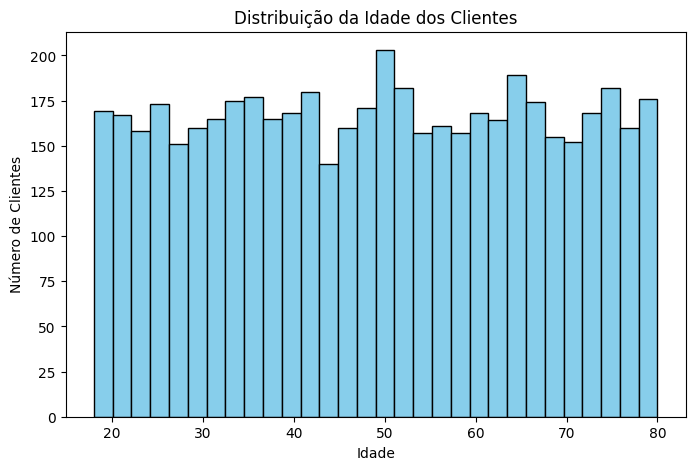

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df_grouped_clean_final['Idade'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')

plt.show()

### Pergunta 6:
Qual é a proporção de clientes com tatuagens e piercings?

In [17]:
df_prop_tatuagens = (df_grouped_clean_final['Tatuagens'] >=1).mean()
print('Proporção de clientes com tatuagens: ', round(df_prop_tatuagens, 2))

Proporção de clientes com tatuagens:  0.83


In [18]:
df_prop_piercings = (df_grouped_clean_final['Piercings'] >=1).mean()
print('Proporção de clientes com piercings: ', round(df_prop_piercings, 2))

Proporção de clientes com piercings:  0.75


### Pergunta 7:
Qual é o estado com a maior proporção de salários acima de 5000 reais entre os clientes?

In [19]:
df_prop_estate = df_grouped_clean_final.groupby('Estado')['Salário'].apply(lambda x: (x > 5000).mean()).idxmax()
print(df_prop_estate)

PI


### Pergunta 8:
Qual é a quantidade de pessoas que possuem tipo de sangue O+ e que possuem filhos?

In [20]:
df_calc_blood_type = df_grouped_clean_final[(df_grouped_clean_final['Tipo Sanguíneo'] == 'O+') & (df_grouped_clean_final['Tem Filhos'] == 'Sim')]
print(df_calc_blood_type.shape[0])

332


### Pergunta 9:
Qual é a média de altura para as pessoas que residem no estado de MG, são solteiras e possuem filhos?

In [21]:
df_calc_high = df_grouped_clean_final[(df_grouped_clean_final['Estado'] == 'MG') & 
                                      (df_grouped_clean_final['Estado Civil'] == 'Solteiro') & 
                                      (df_grouped_clean_final['Tem Filhos'] == 'Sim')]
print(round(df_calc_high['Altura (cm)'].mean(), 2))

175.42


### Pergunta 10:
Qual é a média de idade das pessoas com mais de três cartões de crédito?

In [22]:
df_calc_mean_credit_card = df_grouped_clean_final[(df_grouped_clean_final['Número de Cartões de Crédito'] >= 3)]
print(round(df_calc_mean_credit_card['Idade'].mean(), 0))

49.0


### Pergunta 11:
Crie um boxplot dos salários de todas as pessoas que possuem escolaridade superior. Em seguida, escolha a melhor representação gráfica.

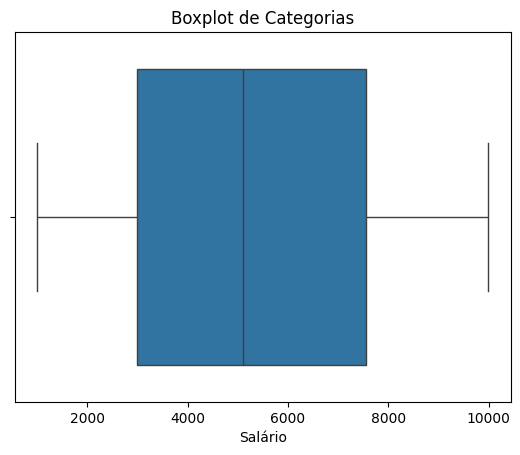

In [23]:

df_calc_sal_superior = df_grouped_clean_final[(df_grouped_clean_final['Escolaridade'] == 'Superior')]
df_calc_sal_superior_final = df_calc_sal_superior['Salário']
df = pd.DataFrame(df_calc_sal_superior_final)
sns.boxplot(x='Salário', data=df)

# Adicionando título
plt.title('Boxplot de Categorias')

# Exibindo o gráfico
plt.show()